# Kenya Hack - Tanzania Tourism Prediction
The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Our goal is to accurately predict tourist expenditure when visiting Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

The datasets to work with:

**Train.csv** - contains the target. This is the dataset that you will use to train your model.

**Test.csv**- is the dataset to which you will apply your model to test how well it performs. Use your model and this dataset to predict the tourist expenditure. The test set contains 1619 rows of tourists information. This dataset includes the same fields as train.csv except for the last column. Note that the target is total_cost.

**SampleSubmission.csv** - shows the submission format for this competition, with the “test_id” column mirroring that of Test.csv and the “total_cost” column containing your predictions. The order of the rows does not matter, but the names of the “test_id” must be correct.

**VariableDefintions.csv** provides definitions of the variables found in test.csv and train.csv
StarterNotebook.ipynb - This notebook will show you how to read in the data, make a model and submit your predictions.

# Analysis plan
**1. Data Collection**

**2. Exploratory Data Analysis (EDA)** - Handling missing values etc.

**3. Feature Engineering**

**4. Model Fitting**

## Importing the standard libraries to work with and preparing the datasets for analysis

In [1]:
# import libraries for data analysis and manipulations
import numpy as np
import pandas as pd
from pandas import  Series, DataFrame

# import libraries for data visualizations
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#for dealing with warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
# load the datasets and set them as pandas dataframes
train = pd.read_csv('Train.csv')
test =   pd.read_csv('Test.csv')
variable_definition = pd.read_csv('VariableDefinitions.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

Our main dataset of interest is the train dataset as we are required to build a model on this dataset.

In [4]:
# preview the train dataset
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
# grab some general information about the train dataset using the info() method
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

By looking at the general information, there are 23 columns and 4809 rows to work with in the train dataset. Most of the columns do not have missing values (they are non-null) except for a few like **travel_with** and others which we shall look at next. Another thing to note is that most of the columns contain categorical data (which we shall have to change to numerical for model building).

In [6]:
# preview the test dataframe
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [7]:
# grab some general information on the test dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

The test dataset has 22 columns and 1601 rows. 2 columns contain integers, 2 contain floating points and the rest contain objects.

### understanding the columns
The descriptions of the various variables in the train and test datasets is in the variable definitions dataframe.

In [8]:
# view the variable definitions dataframe
variable_definition

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


## Exploratory Data Analysis

In [9]:
# check on sum of missing values on each column
train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

It looks like the **travel_with** column has a bunch of missing values (1114). There's also a notable amount in **most_impressing** column (313), **total_male** (5) and **total_female** (3) columns.

In [10]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [11]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


We can start our EDA by trying to understand the different types of tourists that Tanzania receives. Where do these tourists come from? What's their age? Do they travel alone or accompanied by somebody? What's their main business or reason for touring Tanzania? Is there somebody that sponsors or arranges their tour for the country? How long are they going to stay in Tanzania? These are some of the interesting factors that can give us some good intuition on the total amount of money that a tourist can spend during their tour in Tanzania.

**Where do these tourists come from?** We can answer this by looking at the **country** column.

In [12]:
# count the total number of tourists per the country they are coming from
train['country'].value_counts()

UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
SOUTH AFRICA                235
KENYA                       235
GERMANY                     223
ZAMBIA                      191
AUSTRALIA                   186
SPAIN                       165
UGANDA                      159
CANADA                      114
NETHERLANDS                 112
INDIA                        87
CHINA                        65
SWIZERLAND                   64
BURUNDI                      64
JAPAN                        53
BELGIUM                      49
DENMARK                      41
RWANDA                       40
SWEDEN                       37
OMAN                         35
UAE                          33
DRC                          30
IRELAND                      29
MALAYSIA                     23
NORWAY                       21
MALAWI                       20
AUSTRIA                      18
NEW ZEAL

We realize that most of the tourists come from the US (695), followed by the UK (533) and Italy (393) and the least tourists are received from countries like Slovenia, Tunisia that have at most 1.

 **What's their age?** This can be answered using the **age_group** column.

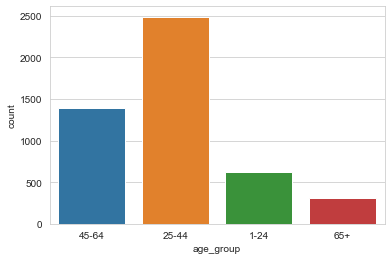

In [13]:
# show the distribution of tourists by their age groups
sns.countplot(x='age_group', data=train)

Most of the tourists received are between the 25-44 age range and very few are aged 65 and above.

**Do they travel alone or accompanied by somebody?**

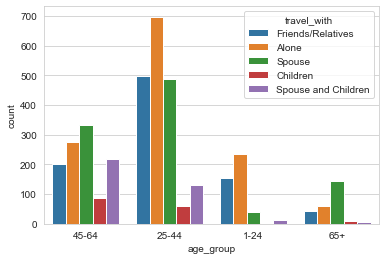

In [14]:
# group the age groups by the people the tourists travel with
sns.countplot(x='age_group', data=train, hue='travel_with')

It looks like tourists aged between 1 and 44 like travelling alone. However, those aged above 45 like travelling with their spouses.

**What's their main business or reason for touring Tanzania?**

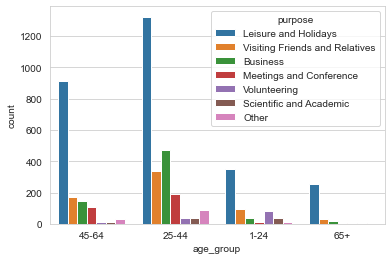

In [15]:
# group the age groups by the purpose of touring
sns.countplot(x='age_group', data=train, hue='purpose')

From the above plot, most tourists received come for leisure and holidays, visiting friends and relatives, and business purposes in that order. This cuts across all the age groups.

**Is there somebody that sponsors or arranges their tour for the country?**

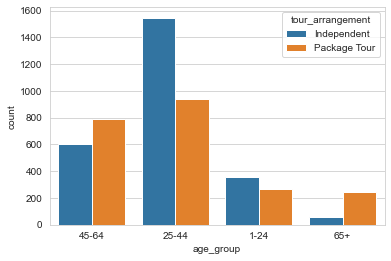

In [16]:
# group the age groups by the tour arrangement
sns.countplot(x='age_group', data=train, hue='tour_arrangement')

It looks like most of the tourists in the age range of 1 to 44 made their tours indepently. However, most of the tourists aged 45 and above came on a package tour.

**How long are they going to stay in Tanzania?**

To answer this question, we shall take into account both the **night_mainland** (total nights spent in main land) and **night_zanzibar** (total nights spent in Zanzibar) columns. The sum of the two should give us the total nights a tourist spent in Tanzania.

In [17]:
# create a column of the total nights spent in Tanzania, by adding night_mainland and night_zanzibar columns
data = [train, test]
for dataset in data:
    
    dataset['night_tanzania'] = dataset['night_mainland'] + dataset['night_zanzibar']

In [18]:
# preview the train dataframe with the newly added night_tanzania column
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,13.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,21.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,32.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,11.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,11.0


In [19]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost,night_tanzania
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03,4809.000000
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06,10.792472
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07,10.779025
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04,0.000000
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05,4.000000
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06,8.000000
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06,14.000000
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07,145.000000


A tourist spent an average of about 11 nights and a maximum of 145 nights during their tour in Tanzania.

(array([3.869e+03, 6.790e+02, 1.570e+02, 4.700e+01, 4.100e+01, 4.000e+00,
        9.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. ,  14.5,  29. ,  43.5,  58. ,  72.5,  87. , 101.5, 116. ,
        130.5, 145. ]),
 <a list of 10 Patch objects>)

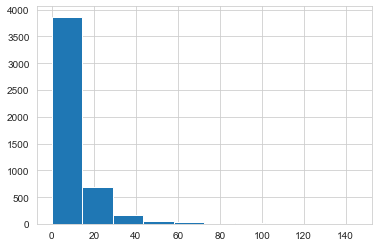

In [20]:
plt.hist(x='night_tanzania', data=train)

## handling missing values

In [21]:
train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
night_tanzania              0
dtype: int64

For the **travel_with** column, I will assume that the null values are for the unknown cases. I will therefore fill them with 'unknown' For the **most_impressing** column, I will assume nothing impressed the tourist. Hence, I will fill them with 'none'. For the **total_female** and **total_male**columns, I will fill them with the mean of the column.

In [22]:
# fill null values
data = [train, test]

for dataset in data:
    dataset['travel_with'].fillna('unknown', inplace=True)
    dataset['most_impressing'].fillna('none', inplace=True)
    dataset['total_female'].fillna(train['total_female'].mean(), inplace=True)
    dataset['total_male'].fillna(train['total_male'].mean(), inplace=True)

In [23]:
# ensure there are no any other missing values in the train dataset
train.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
night_tanzania           0
dtype: int64

In [24]:
# ensure there are no any other missing values in the test dataset
test.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
night_tanzania           0
dtype: int64

In [25]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,13.0
1,tour_10,UNITED KINGDOM,25-44,unknown,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,21.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,32.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,11.0
4,tour_1004,CHINA,1-24,unknown,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,11.0


## change categorical values to numerical values

First, we shall start by the binary columns (columns with only two outcomes). These are **package_transport_int**, **package_accomodation**, **package_food**, **package_transport_tz**, **package_sightseeing**, **package_guided_tour**, **package_insurance** and **first_trip_tz**. We shall create a function that takes in a column and returns 0 if it's a NO and 1 if it's a YES.

In [26]:
def binary(variable):
    if variable == 'No':
        return 0
    else:
        return 1

In [27]:
data = [train, test]

for dataset in data:
    dataset['package_transport_int'] = dataset['package_transport_int'].apply(binary)
    dataset['package_accomodation'] = dataset['package_accomodation'].apply(binary)
    dataset['package_food'] = dataset['package_food'].apply(binary)
    dataset['package_transport_tz'] = dataset['package_transport_tz'].apply(binary)
    dataset['package_sightseeing'] = dataset['package_sightseeing'].apply(binary)
    dataset['package_guided_tour'] = dataset['package_guided_tour'].apply(binary)
    dataset['package_insurance'] = dataset['package_insurance'].apply(binary)
    dataset['first_trip_tz'] = dataset['first_trip_tz'].apply(binary)

In [28]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,0,0,0,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5,13.0
1,tour_10,UNITED KINGDOM,25-44,unknown,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,0,0,0,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,21.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,0,0,0,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0,32.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,0,1,1,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0,11.0
4,tour_1004,CHINA,1-24,unknown,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,0,0,0,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0,11.0


In [29]:
# assign lables to other categorical values using scikit-learn LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for dataset in data:
    dataset['country'] = le.fit_transform(dataset['country'])
    dataset['age_group'] = le.fit_transform(dataset['age_group'])
    dataset['travel_with'] = le.fit_transform(dataset['travel_with'])
    dataset['purpose'] = le.fit_transform(dataset['purpose'])
    dataset['main_activity'] = le.fit_transform(dataset['main_activity'])
    dataset['info_source'] = le.fit_transform(dataset['info_source'])
    dataset['tour_arrangement'] = le.fit_transform(dataset['tour_arrangement'])
    dataset['payment_mode'] = le.fit_transform(dataset['payment_mode'])
    dataset['most_impressing'] = le.fit_transform(dataset['most_impressing'])

In [30]:
# converting floating points to integers

for dataset in data:
    dataset["total_female"] = dataset['total_female'].astype('int')
    dataset["total_male"] = dataset['total_male'].astype('int')
    dataset["night_mainland"] = dataset['night_mainland'].astype('int')
    dataset["night_zanzibar"] = dataset['night_zanzibar'].astype('int')
    dataset["night_tanzania"] = dataset['night_tanzania'].astype('int')
    

In [31]:
train.drop('ID', axis=1, inplace=True)

In [32]:
train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
0,89,2,2,1,1,1,7,0,0,0,0,0,0,0,0,0,13,0,0,0,2,674602.5,13
1,99,1,5,1,0,1,3,7,0,0,0,0,0,0,0,0,14,7,0,1,6,3214906.5,21
2,99,1,0,0,1,5,3,0,0,0,0,0,0,0,0,0,1,31,0,0,1,3315000.0,32
3,99,1,3,1,1,1,7,5,1,0,1,1,1,1,1,0,11,0,0,1,2,7790250.0,11
4,13,0,5,1,0,1,7,5,0,0,0,0,0,0,0,0,7,4,0,1,4,1657500.0,11


In [33]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,night_tanzania
0,tour_1,1,2,3,1,1,1,7,5,1,1,1,1,1,1,1,1,10,3,0,1,0,13
1,tour_100,70,1,2,0,4,0,7,3,1,1,1,0,0,0,0,0,13,0,0,0,6,13
2,tour_1001,26,1,2,3,0,1,0,0,0,0,0,0,0,0,0,0,7,14,0,0,4,21
3,tour_1006,10,0,2,2,0,1,3,7,0,0,0,0,0,0,0,0,0,4,0,1,2,4
4,tour_1009,81,2,2,2,2,1,7,0,1,1,1,1,1,0,0,0,10,0,0,1,2,10


## explore correlations between total cost and some of the variables

Text(0.5, 1.0, 'Correlations')

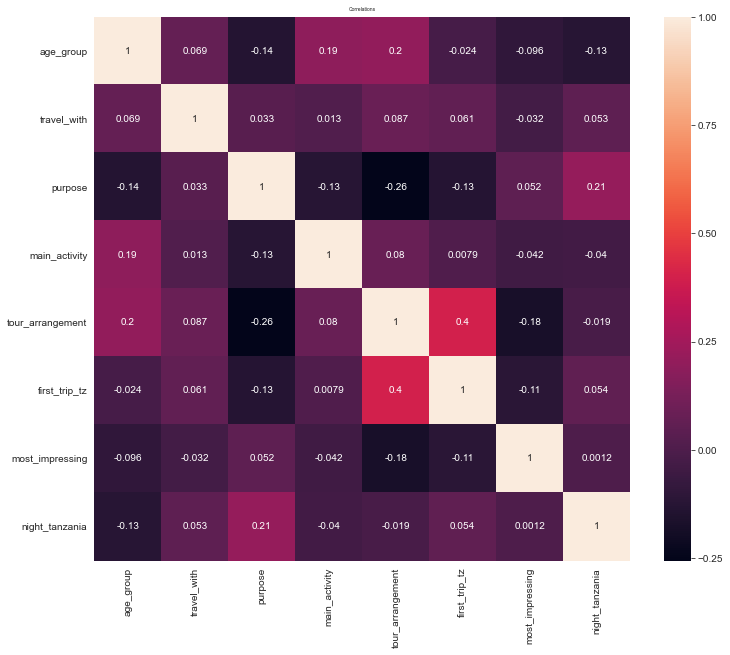

In [35]:
fig = plt.figure(figsize = (12, 10))
sns.heatmap(train[['age_group', 'travel_with', 'purpose', 'main_activity', 'tour_arrangement',
                    'first_trip_tz', 'most_impressing', 'night_tanzania']].corr(), annot=True)
plt.title('Correlations', fontsize=5)

In [36]:
train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
0,89,2,2,1,1,1,7,0,0,0,0,0,0,0,0,0,13,0,0,0,2,674602.5,13
1,99,1,5,1,0,1,3,7,0,0,0,0,0,0,0,0,14,7,0,1,6,3214906.5,21
2,99,1,0,0,1,5,3,0,0,0,0,0,0,0,0,0,1,31,0,0,1,3315000.0,32
3,99,1,3,1,1,1,7,5,1,0,1,1,1,1,1,0,11,0,0,1,2,7790250.0,11
4,13,0,5,1,0,1,7,5,0,0,0,0,0,0,0,0,7,4,0,1,4,1657500.0,11


In [37]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,night_tanzania
0,tour_1,1,2,3,1,1,1,7,5,1,1,1,1,1,1,1,1,10,3,0,1,0,13
1,tour_100,70,1,2,0,4,0,7,3,1,1,1,0,0,0,0,0,13,0,0,0,6,13
2,tour_1001,26,1,2,3,0,1,0,0,0,0,0,0,0,0,0,0,7,14,0,0,4,21
3,tour_1006,10,0,2,2,0,1,3,7,0,0,0,0,0,0,0,0,0,4,0,1,2,4
4,tour_1009,81,2,2,2,2,1,7,0,1,1,1,1,1,0,0,0,10,0,0,1,2,10


## fitting a linear regression model on the train data using sklearn

In [38]:
# import machine learning algorithms to use
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# to evaluate your machine learning results
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# data columns for the training
X_multi = train.drop('total_cost',axis=1)

# y target
Y_target = train.total_cost

## training and validation

In [40]:
# train test split
X_train, X_test, y_train, y_test = train_test_split( X_multi, Y_target, test_size=0.4, random_state=0)

In [41]:
X_train.shape, y_train.shape

((2885, 22), (2885,))

In [42]:
X_test.shape, y_test.shape

((1924, 22), (1924,))

### linear regression model

In [43]:
lreg = LinearRegression()

In [44]:
regression_fit = lreg.fit(X_train, y_train)

In [45]:
# y predict
y_pred = regression_fit.predict(X_test)

In [46]:
# mean squared error
mean_squared_error(y_test, y_pred)

105850544635236.19

In [47]:
# coefficient of determination
r2_score(y_test, y_pred)

0.2541595757424723

In [48]:
regression_fit.score(X_test, y_test)

0.2541595757424723

In [49]:
regression_fit.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [50]:
X_test.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,night_tanzania
825,83,1,5,0,1,1,7,5,1,0,1,1,1,1,1,0,4,0,0,0,1,4
1705,41,2,2,1,1,1,0,4,1,1,1,1,1,0,0,0,0,12,0,1,2,12
4133,31,1,2,2,1,4,7,1,0,0,0,0,0,0,0,0,12,3,0,1,2,15
3537,89,1,3,1,1,1,7,5,1,1,1,1,1,1,1,0,10,7,0,1,0,17
3555,104,2,0,0,1,3,5,7,0,0,0,0,0,0,0,0,3,0,0,0,4,3


In [51]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,night_tanzania
0,tour_1,1,2,3,1,1,1,7,5,1,1,1,1,1,1,1,1,10,3,0,1,0,13
1,tour_100,70,1,2,0,4,0,7,3,1,1,1,0,0,0,0,0,13,0,0,0,6,13
2,tour_1001,26,1,2,3,0,1,0,0,0,0,0,0,0,0,0,0,7,14,0,0,4,21
3,tour_1006,10,0,2,2,0,1,3,7,0,0,0,0,0,0,0,0,0,4,0,1,2,4
4,tour_1009,81,2,2,2,2,1,7,0,1,1,1,1,1,0,0,0,10,0,0,1,2,10


### decision tree

In [52]:
# create a decision tree regressor
dec_tree = DecisionTreeRegressor()

In [53]:
# fit the DecisionTreeRegressor model
dec_tree_fit = dec_tree.fit(X_train, y_train)

In [54]:
# predict y using RegressionTreeRegressor model
y_dec_tree = dec_tree.predict(X_test)

In [55]:
# print mean_squared error
print('The mean squared error for the DecisionTreeRegressor is: %.2f'%mean_squared_error(y_test, y_dec_tree))

The mean squared error for the DecisionTreeRegressor is: 183132286671364.97


In [56]:
# print the coefficient of determination
print('The coefficient of determination for the DecisionTreeRegressor is: %.2f'%r2_score(y_test, y_dec_tree))

The coefficient of determination for the DecisionTreeRegressor is: -0.29


### random forest

In [57]:
# create a RandomForestRegressor
ran_fore = RandomForestRegressor()

In [58]:
# fit the RandomForestRegressor model
ran_fore_fit = ran_fore.fit(X_train, y_train)

In [59]:
# predict y using RegressionTreeRegressor model
y_ran_fore = ran_fore.predict(X_test)

In [60]:
# print mean_squared error
print('The mean squared error for the DecisionTreeRegressor is: %.2f'%mean_squared_error(y_test, y_ran_fore))

The mean squared error for the DecisionTreeRegressor is: 101782093009341.05


In [63]:
# print the coefficient of determination
print('The coefficient of determination for the DecisionTreeRegressor is: %.2f'%r2_score(y_test, y_ran_fore))

The coefficient of determination for the DecisionTreeRegressor is: 0.28


In [64]:
train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
0,89,2,2,1,1,1,7,0,0,0,0,0,0,0,0,0,13,0,0,0,2,674602.5,13
1,99,1,5,1,0,1,3,7,0,0,0,0,0,0,0,0,14,7,0,1,6,3214906.5,21
2,99,1,0,0,1,5,3,0,0,0,0,0,0,0,0,0,1,31,0,0,1,3315000.0,32
3,99,1,3,1,1,1,7,5,1,0,1,1,1,1,1,0,11,0,0,1,2,7790250.0,11
4,13,0,5,1,0,1,7,5,0,0,0,0,0,0,0,0,7,4,0,1,4,1657500.0,11


In [65]:
train.describe()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,night_tanzania
count,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03,4809.000000
mean,65.924517,1.287170,2.497193,0.926180,1.009565,1.702849,4.546891,3.009357,0.465585,0.301934,0.458931,0.428571,0.393013,0.309836,0.322312,0.151799,8.488043,2.304429,0.137035,0.674361,2.663340,8.114389e+06,10.792472
std,34.403043,0.769426,1.854538,1.288048,1.138273,1.674437,2.876177,2.585098,0.498866,0.459144,0.498362,0.494923,0.488470,0.462474,0.467410,0.358863,10.427624,4.227080,0.361032,0.468662,2.132271,1.222490e+07,10.779025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+04,0.000000
25%,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,8.121750e+05,4.000000
50%,83.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,2.000000,3.397875e+06,8.000000
75%,99.000000,2.000000,4.000000,1.000000,1.000000,2.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,4.000000,0.000000,1.000000,4.000000,9.945000e+06,14.000000
max,104.000000,3.000000,5.000000,49.000000,44.000000,6.000000,8.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,145.000000,61.000000,3.000000,1.000000,7.000000,9.953288e+07,145.000000


In [66]:
print('Train', X_train.shape, y_train.shape)
print('Test', y_test.shape, y_test.shape)

Train (2885, 22) (2885,)
Test (1924,) (1924,)


## Feature Selection

## Numerical Feature Selection
1. Correlation Statistics
2. Mutual Information Statistics

### Correlation Feature Selection

In [67]:
# correlation feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#### select all  features assuming all are highly scoring against the target

In [68]:
'''
# feature selection
def select_corr_features(X_train, y_train, X_test):
    # configure to select all features
    cfs = SelectKBest(score_func=f_regression, k='all')
    
    # learn relationship from training data
    cfs.fit(X_train, y_train)
    
    # transform train input data
    X_train_cfs = cfs.transform(X_train)
    
    # transform test input data
    X_test_cfs = cfs.transform(X_test)
    
    return X_train_cfs, X_test_cfs, cfs
'''

"\n# feature selection\ndef select_corr_features(X_train, y_train, X_test):\n    # configure to select all features\n    cfs = SelectKBest(score_func=f_regression, k='all')\n    \n    # learn relationship from training data\n    cfs.fit(X_train, y_train)\n    \n    # transform train input data\n    X_train_cfs = cfs.transform(X_train)\n    \n    # transform test input data\n    X_test_cfs = cfs.transform(X_test)\n    \n    return X_train_cfs, X_test_cfs, cfs\n"

In [69]:
'''
# feature selection for our train and test sets
X_train_cfs, X_test_cfs, cfs = select_corr_features(X_train, y_train, X_test)
'''

'\n# feature selection for our train and test sets\nX_train_cfs, X_test_cfs, cfs = select_corr_features(X_train, y_train, X_test)\n'

In [70]:
'''
# what are the scores for the features
for i in range(len(cfs.scores_)):
    print('Features %d: %f' % (i, cfs.scores_[i]))
'''

"\n# what are the scores for the features\nfor i in range(len(cfs.scores_)):\n    print('Features %d: %f' % (i, cfs.scores_[i]))\n"

In [71]:
'''
# plot the scores
plt.bar([i for i in range(len(cfs.scores_))], cfs.scores_)
plt.xlabel('Feature')
plt.ylabel('Score against the Target')
'''

"\n# plot the scores\nplt.bar([i for i in range(len(cfs.scores_))], cfs.scores_)\nplt.xlabel('Feature')\nplt.ylabel('Score against the Target')\n"

#### select 10 most important highly scoring features

In [72]:
'''
# feature selection
def select_10_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs
'''

'\n# feature selection\ndef select_10_features(X_train, y_train, X_test):\n    # configure to select all features\n    fs = SelectKBest(score_func=f_regression, k=10)\n    \n    # learn relationship from training data\n    fs.fit(X_train, y_train)\n    \n    # transform train input data\n    X_train_fs = fs.transform(X_train)\n    \n    # transform test input data\n    X_test_fs = fs.transform(X_test)\n    \n    return X_train_fs, X_test_fs, fs\n'

In [73]:
'''
# feature selection for our train and test sets
X_train_fs, X_test_fs, fs = select_10_features(X_train, y_train, X_test)
'''

'\n# feature selection for our train and test sets\nX_train_fs, X_test_fs, fs = select_10_features(X_train, y_train, X_test)\n'

In [74]:
'''
# what are the scores for the features
for i in range(len(fs.scores_)):
    print('Features %d: %f' % (i, fs.scores_[i]))
'''

"\n# what are the scores for the features\nfor i in range(len(fs.scores_)):\n    print('Features %d: %f' % (i, fs.scores_[i]))\n"

In [75]:
'''
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Feature')
plt.ylabel('Score against the Target')
'''

"\n# plot the scores\nplt.bar([i for i in range(len(fs.scores_))], fs.scores_)\nplt.xlabel('Feature')\nplt.ylabel('Score against the Target')\n"

### Mutual Information Feature Selection

In [76]:
# import mutual_info_regression feature selection technique
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_mf_features(X_train, y_train, X_test):
    # configure to select all features
    mfs = SelectKBest(score_func=mutual_info_regression, k=7)
    
    # learn relationship from training data
    mfs.fit(X_train, y_train)
    
    # transform train input data
    X_train_mfs = mfs.transform(X_train)
    
    # transform test input data
    X_test_mfs = mfs.transform(X_test)
    
    return X_train_mfs, X_test_mfs, mfs

In [77]:
# feature selection for our train and test sets
X_train_mfs, X_test_mfs, mfs = select_mf_features(X_train, y_train, X_test)

In [78]:
# what are the scores for the features
for i in range(len(mfs.scores_)):
    print('Features %d: %f' % (i, mfs.scores_[i]))

Features 0: 0.090273
Features 1: 0.082156
Features 2: 0.081305
Features 3: 0.013790
Features 4: 0.032450
Features 5: 0.113989
Features 6: 0.074703
Features 7: 0.107358
Features 8: 0.273341
Features 9: 0.168089
Features 10: 0.262779
Features 11: 0.239629
Features 12: 0.196785
Features 13: 0.150910
Features 14: 0.143605
Features 15: 0.075993
Features 16: 0.040916
Features 17: 0.049452
Features 18: 0.020409
Features 19: 0.079289
Features 20: 0.036561
Features 21: 0.048398


Text(0, 0.5, 'Score against the Target')

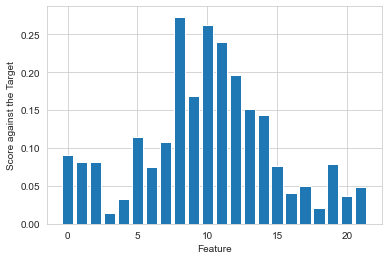

In [79]:
# plot the scores
plt.bar([i for i in range(len(mfs.scores_))], mfs.scores_)
plt.xlabel('Feature')
plt.ylabel('Score against the Target')

### Model built using Mutual Information Features

##### Linear Regression

In [80]:
# create a LinearRegression object
model = LinearRegression()

In [81]:
# fit the model
model.fit(X_train_mfs, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# evaluate the model
y_mfs_pred = model.predict(X_test_mfs)

In [83]:
# evaluate the predictions using mean_squared_error
mean_squared_error(y_test, y_mfs_pred)

108108211935580.95

In [84]:
# evaluate the predictions using coefficient of determination
r2_score(y_test, y_mfs_pred)

0.23825167897232236

##### random forest

In [85]:
# create a RandomForestRegressor object
rfmodel = RandomForestRegressor()

In [86]:
# fit the model
rfmodel.fit(X_train_mfs, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [87]:
# evaluate the model
y_mfs_rfpred = rfmodel.predict(X_test_mfs)

In [88]:
# evaluate the predictions using mean_squared_error
mean_squared_error(y_test, y_mfs_rfpred)

107876983941494.45

In [89]:
# evaluate the predictions using coefficient of determination
r2_score(y_test, y_mfs_rfpred)

0.2398809496180615